## Apply LDA for feature dimension reduction followed by Logistic Regression - compare the results - to decide the dimensionality of feature in the lower-dimension.


In [3]:
import numpy as np

from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot

We will create a Pipeline to first perform LDA to project the data into a lower-dimensional space (with diffirent values of n_components in the LDA object), sunsequently train a LogisticRegression classifier on the at lower-dimensonal data.

In [4]:
# Generate synthetic data
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                      n_redundant=5, random_state=100, n_classes=10 )
  return X, y

In [5]:
from sklearn import model_selection

# Get a list of model to evaluate

def get_models():
  models = dict()
  for i in range (1, 10):
    steps = [('lda', LinearDiscriminantAnalysis(n_components=i)),
             ('lr', LogisticRegression())]
    models[str(i)] = Pipeline(steps=steps)
  return models



In [10]:
# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return score

In [14]:

# Generate data
X, y = get_dataset()


# get  models to evalutae
models = get_models()


# evaluate the models and stote results

results, names = list(), list()

for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>1 0.166 (0.025)
>2 0.237 (0.039)
>3 0.297 (0.041)
>4 0.324 (0.039)
>5 0.340 (0.044)
>6 0.341 (0.047)
>7 0.351 (0.049)
>8 0.357 (0.045)
>9 0.365 (0.045)


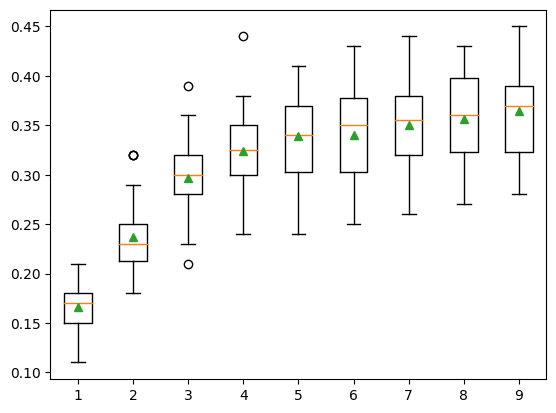

In [13]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
